## Chuan bi du lieu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           2584 non-null   int64
 1   experience_level    2584 non-null   int64
 2   employment_type     2584 non-null   int64
 3   job_title           2584 non-null   int64
 4   salary              2584 non-null   int64
 5   salary_currency     2584 non-null   int64
 6   salary_in_usd       2584 non-null   int64
 7   employee_residence  2584 non-null   int64
 8   remote_ratio        2584 non-null   int64
 9   company_location    2584 non-null   int64
 10  company_size        2584 non-null   int64
dtypes: int64(11)
memory usage: 222.2 KB


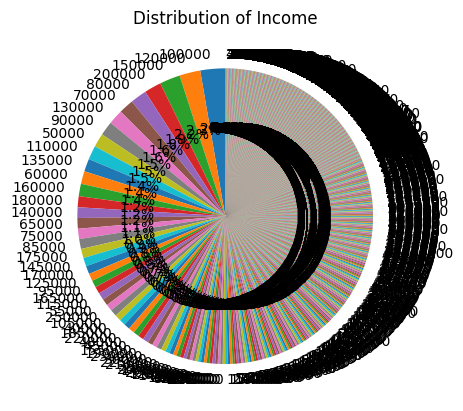

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#Doc file csv
data = pd.read_csv('ds_salaries_cleaned.csv')
#In ra thong tin 
data.info()
data.describe()
data.head()
#visualize
salary_counts = data['salary'].value_counts()
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Income')

plt.show()

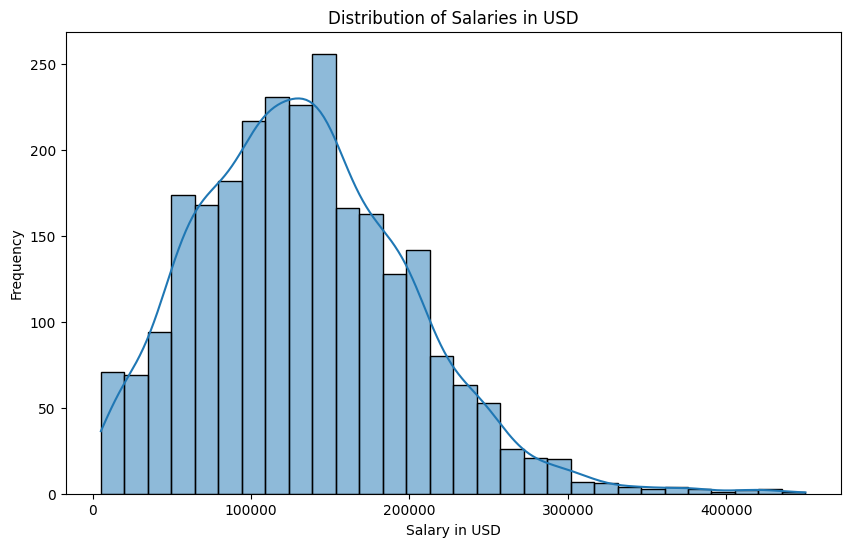

In [3]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], kde=True, bins=30)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

## Xu ly du lieu

In [4]:
data = data.drop(['company_location'], axis=1)

In [5]:
from sklearn.model_selection import train_test_split

#Tao X,y
y = data['salary_in_usd']
X = data.drop(['salary_in_usd'], axis=1)

#Chia du lieu vao tap test, tran 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

#In kich thuoc test size, train size
print("Train size: ", X_train.shape)
print("Test size : ", X_test.shape) 

Train size:  (1938, 9)
Test size :  (646, 9)


## Khoi tao, Huan luyen mo hinh

In [6]:
from sklearn.neighbors import KNeighborsRegressor

#Mo hinh 
model = KNeighborsRegressor(metric='manhattan', n_neighbors= 4, weights='uniform' )
model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=4)

## Du doan tren tap kiem thu va danh gia hieu nang

In [7]:
from sklearn.metrics import mean_absolute_error

#Khoi tao mo hinh
y_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
print(f"MAE : {MAE}")

MAE : 4791.404411764706


## Tim tham so tot nhat


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': list(range(1, 100)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
#Tạo GridSearchCV
grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=5)

#Train GridSearchCV
grid.fit(X_train, y_train)

#In ra thông số tốt nhất
print(f"Thông số tốt nhất: {grid.best_params_}")

#Dự đoán với mô hình tối ưu nhất
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

#Đánh giá mô hình
optimized = mean_absolute_error(y_test, y_pred)
print(f"Giá trị tối ưu nhất: {optimized}")

Fitting 10 folds for each of 2376 candidates, totalling 23760 fits
Thông số tốt nhất: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Giá trị tối ưu nhất: 4791.404411764706
